## PUI 2016 HOMEWORK 11, ASSIGNMENT 1
#### Ian Wright, iw453
#### November 2016

In [65]:
# standard imports
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap    
%matplotlib inline
plt.style.use('ggplot')

# geo-imports
import geopandas as gpd
from fiona.crs import from_epsg
import shapely

# env variables
PUIdata = os.getenv('PUIDATA')
print 'PUIdata:', PUIdata

PUIdata: /Users/ian/school/hw/PUI2016/PUIDATA


#### Note that this file name may be different from that of the grader's - may need to replace string if this is the case.

In [10]:
# load a shapefile with all NYC census 'tract' shapes
#shape_path = PUIdata + '/2010 Census Tracts/geo_export_c276be63-19ca-4fc2-a075-8bef91be0c36.shp'

# OR load shapefile with all NYC census 'block' shapes
shape_path = PUIdata + '/2010 Census Blocks/geo_export_a1c60c38-a8c8-4114-95d9-2d8931836563.shp'

ct_shape = gpd.GeoDataFrame.from_file(shape_path)

In [11]:
# translate shapefile coordinate system into lat/long
ct_shape.crs = from_epsg(4326)
print len(ct_shape), ' tracts in NYC'
ct_shape.head()

38794  tracts in NYC


,bctcb_2010,boro_code,boro_name,cb_2010,ct_2010,geometry,shape_area,shape_leng
0,50009001000,5,Staten Island,1000,000900,POLYGON ((-74.07920577013245 40.64343078374567...,244589.603884,2508.948115
1,50020011000,5,Staten Island,1000,002001,POLYGON ((-74.07061992438017 40.61085506705416...,111006.286826,1345.886422
2,50027001000,5,Staten Island,1000,002700,"POLYGON ((-74.07524403976549 40.6260063240241,...",150406.784296,1703.381058
3,50040001000,5,Staten Island,1000,004000,POLYGON ((-74.08708799689826 40.61116883123925...,141296.561149,1511.173743
4,50064001000,5,Staten Island,1000,006400,POLYGON ((-74.07643744511992 40.60100160655585...,200784.983607,1978.243852


In [12]:
# take only the Brooklyn census tracts
ct_shape_bk = ct_shape[ct_shape['boro_name'] == 'Brooklyn']
print len(ct_shape_bk), ' tracts in BK'
ct_shape_bk.head()

9682  tracts in BK


,bctcb_2010,boro_code,boro_name,cb_2010,ct_2010,geometry,shape_area,shape_leng
5175,30002001000,3,Brooklyn,1000,000200,POLYGON ((-74.00659158337982 40.65561273365178...,208484.989566,2097.493132
5176,30003011000,3,Brooklyn,1000,000301,POLYGON ((-73.99514512602698 40.69877384567195...,63365.958361,1006.913933
5177,30005011000,3,Brooklyn,1000,000501,POLYGON ((-73.99270830309769 40.69809925981346...,116303.194723,1431.900698
5178,30011001000,3,Brooklyn,1000,001100,"POLYGON ((-73.9851430608965 40.69488514296982,...",54802.306859,951.657541
5179,30015001000,3,Brooklyn,1000,001500,POLYGON ((-73.98305147125492 40.69837793354039...,79196.530872,1129.348482


In [16]:
# where is CUSP? according to Google maps:
# -73.9866, 40.6931

cusp_point = shapely.geometry.Point(-73.9866, 40.6931)

In [54]:
# which census block is CUSP in? Loop through blocks to see which one contains cusp_point
cusp_index = 0
for block_index in ct_shape_bk.index:
    if shapely.geometry.asShape(ct_shape_bk.geometry[block_index]).contains(cusp_point):
        print 'CUSP located in census block with index:', block_index
        cusp_index = block_index

CUSP located in census block with index: 7739


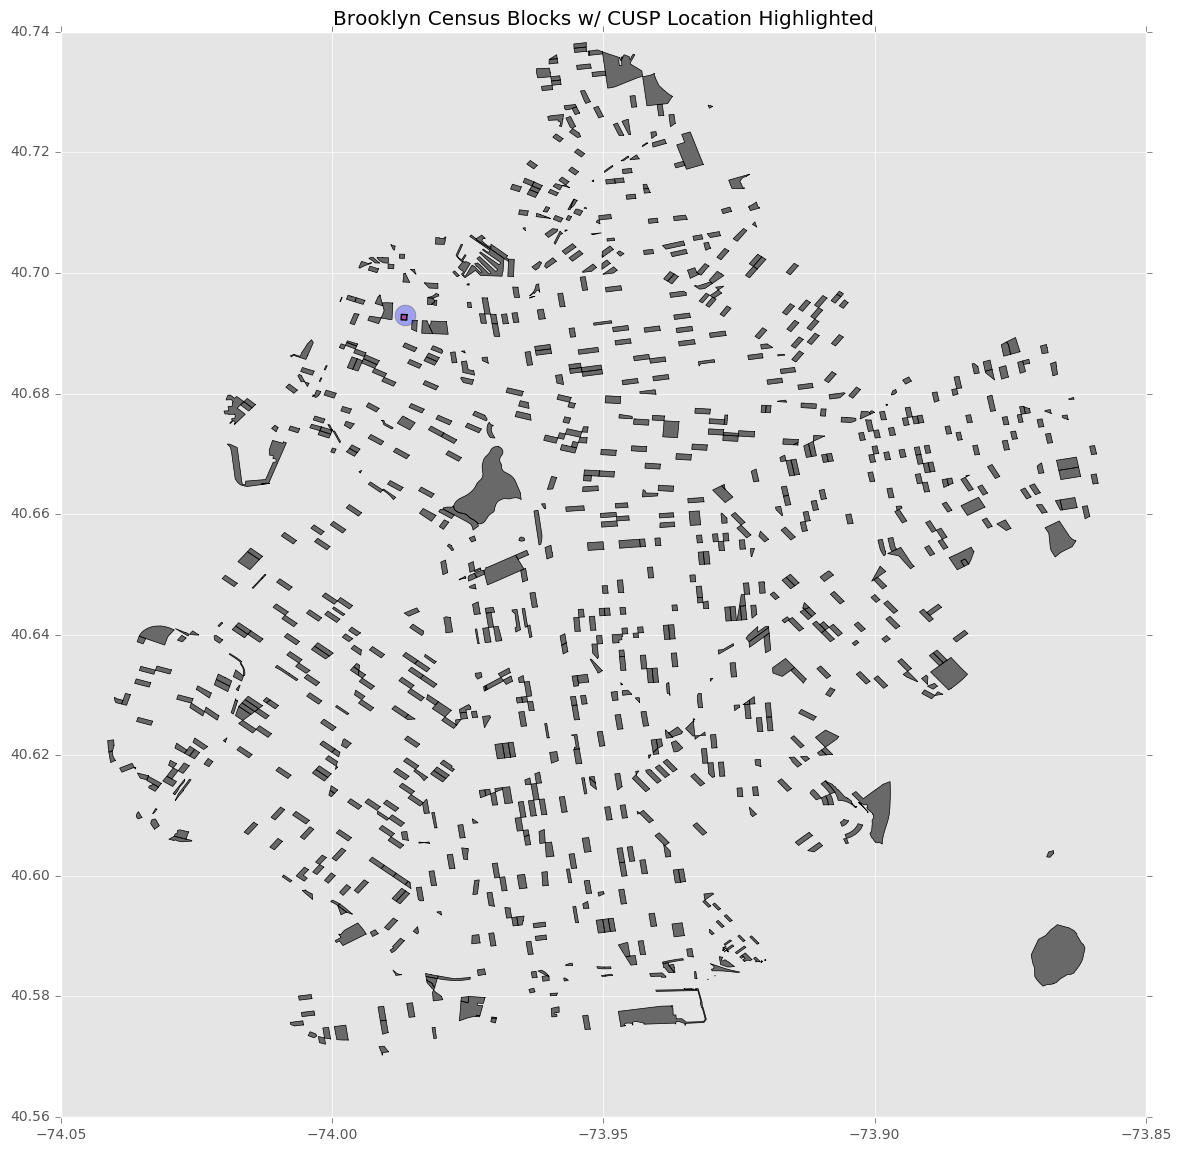

In [69]:
# draw a map of every 10th census block in Brooklyn, with CUSP's location highlighted
f, ax = plt.subplots(figsize=(14, 14))

# plot every 10th census block
all_grey = ListedColormap('dimgrey')
ct_shape_bk[::10].plot(
    column='boro_name', 
    alpha=1, 
    cmap=all_grey, 
    linewidth=0.5, 
    ax=ax)

# add CUSP as a single point to the map (semi-transparent, large circle)
ax.plot(cusp_point.x, cusp_point.y, 'bo', markersize=15, alpha=0.3)

# overplot CUSP's containing census block in red
all_red = ListedColormap('red')
ct_shape_bk[ct_shape_bk.index == cusp_index].plot(
    cmap=all_red,
    ax=ax)

plt.title("Brooklyn Census Blocks w/ CUSP Location Highlighted")

##### Figure 1: Every 10th Brooklyn census block is mapped. CUSP's exact location (point) is at the center of the semi-transparent blue circle. The census block that encompasses CUSP is overplotted in red.